# 1D Biased Random Walk

## Import libraries

In [74]:
import numpy as np #handles arrays 
import matplotlib.pyplot as plt #for plotting (basic)
import seaborn as sns #also for plotting 
from IPython.display import display, Latex #for formatting print

import scipy.special #for biomial

In [75]:
# Random generator of numpy 
rng = np.random.default_rng()

## Analytical formula

### Define the analytical formula as a separate function, which you call with the different values of p,w, and j

In [81]:
def probability_1d_biased_RW(p,q, n,j): 
    nr, nl =(n+j)/2, (n-j)/2
    A= ((1)+(-1)**(n+j))/2
    B= p**(nr) * q**(nl)
    C=scipy.special.binom(n, nl)
    return A*B*C 

#### As always, start with a single value of p, and then generalize for all different ps

In [82]:
p=0.6
q=1-p
n=20

p_n=np.zeros(40+1) # the total number of values we need to store 
for j in range(-20,20+1):
    p_n[j+20] = probability_1d_biased_RW(p,q, n,j) #the index for the p_n array is given by j+20, since the array index starts from 0

In [84]:
x_array=np.arange(-20, 20+1) #the x_array, which is the values of j

<BarContainer object of 41 artists>

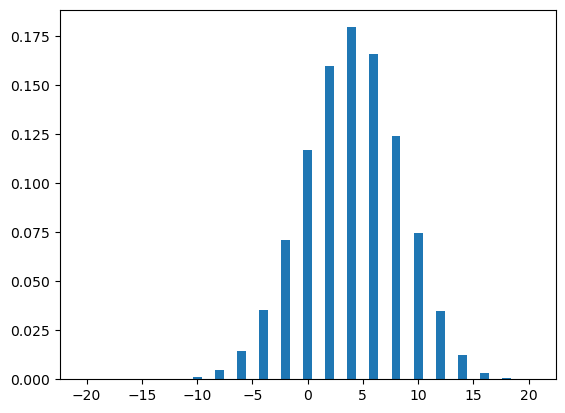

In [85]:
plt.bar(x_array,p_n) #plot to get an idea

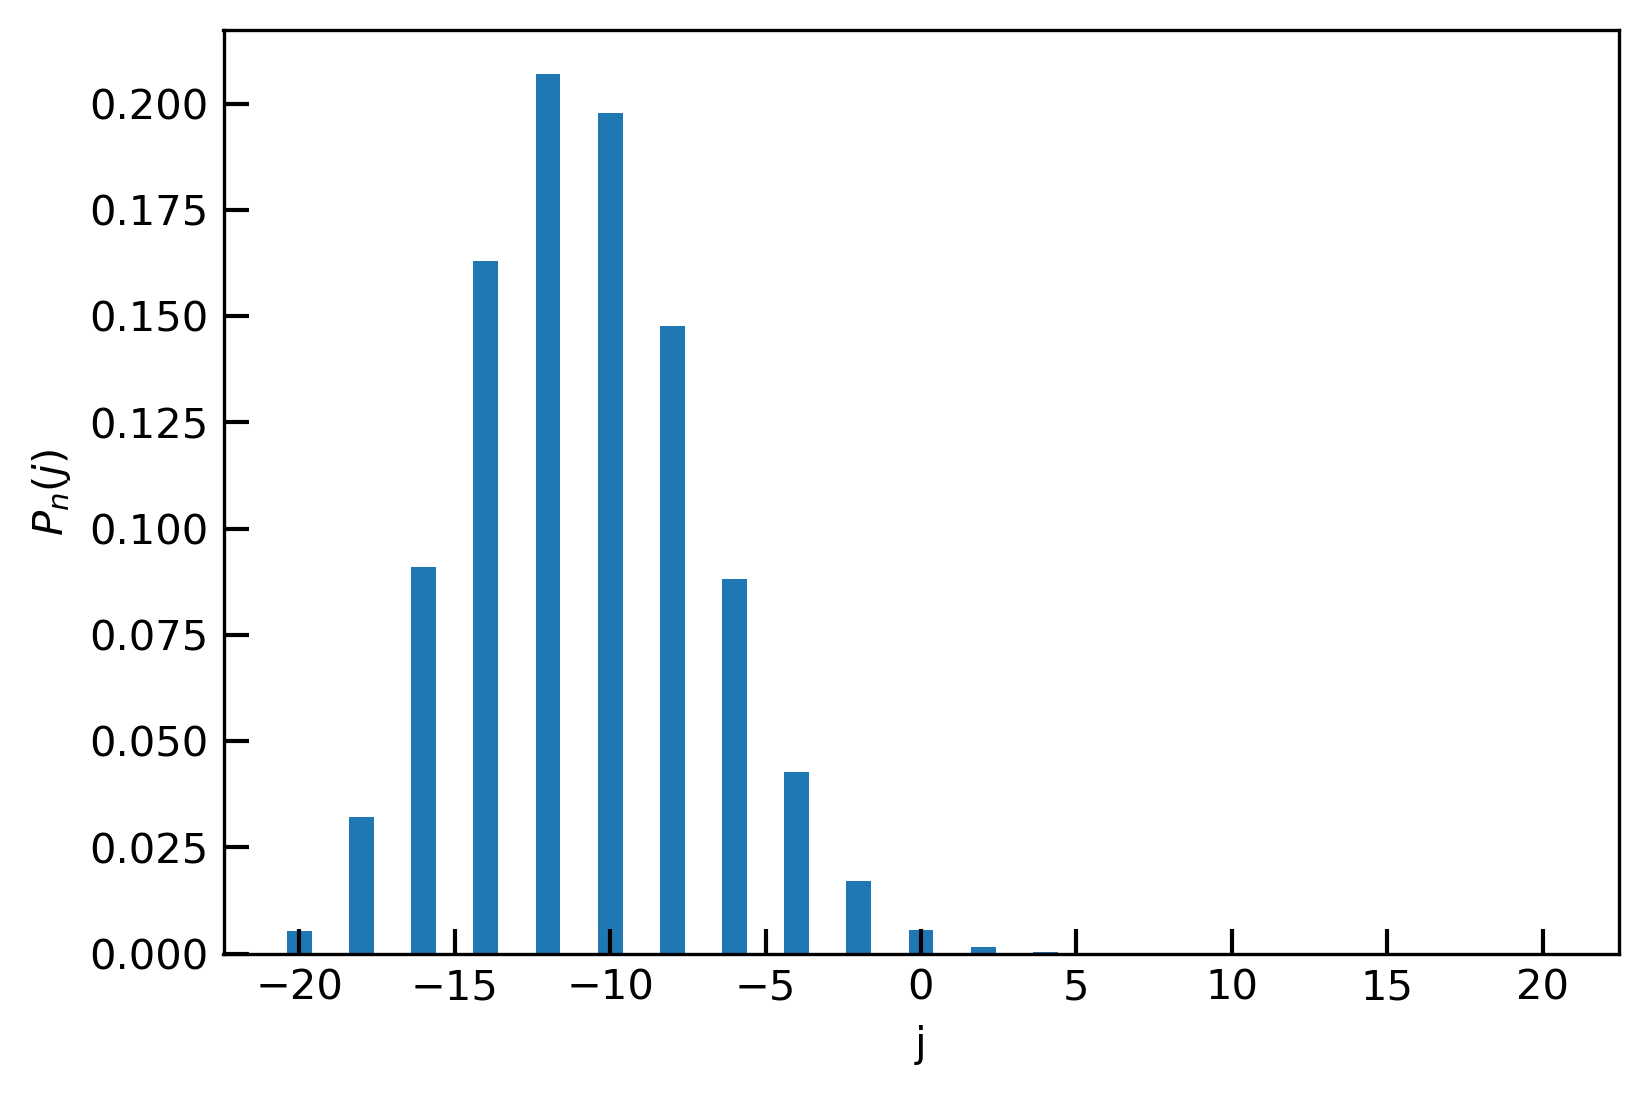

In [94]:
#now format your figure
row_num, col_num=1,1
fig,ax = plt.subplots(row_num,col_num)
fig.set_size_inches(6*col_num,4*row_num)
fig.set_dpi(300)

ax.bar(x_array,p_n)
ax.set_xlabel('j') 
ax.set_ylabel(r'$P_n(j)$')
ax.tick_params(axis='both', which='major', direction='in', length=6, width=1)

#### Generalize for many values of p

In [92]:
ps=np.array([0.6, 0.75, 0.9, 0.23])
qs=1-ps
n=20

# I will choose to store pn for each p as a dictionary
all_pn={}

for p,q in zip(ps,qs): 
    p_n=np.zeros(40+1) # the total number of values we need to store 
    for j in range(-20,20+1):
        p_n[j+20] = probability_1d_biased_RW(p,q, n,j) #the index for the p_n array is given by j+20, since the array index starts from 0
    all_pn[p]=p_n

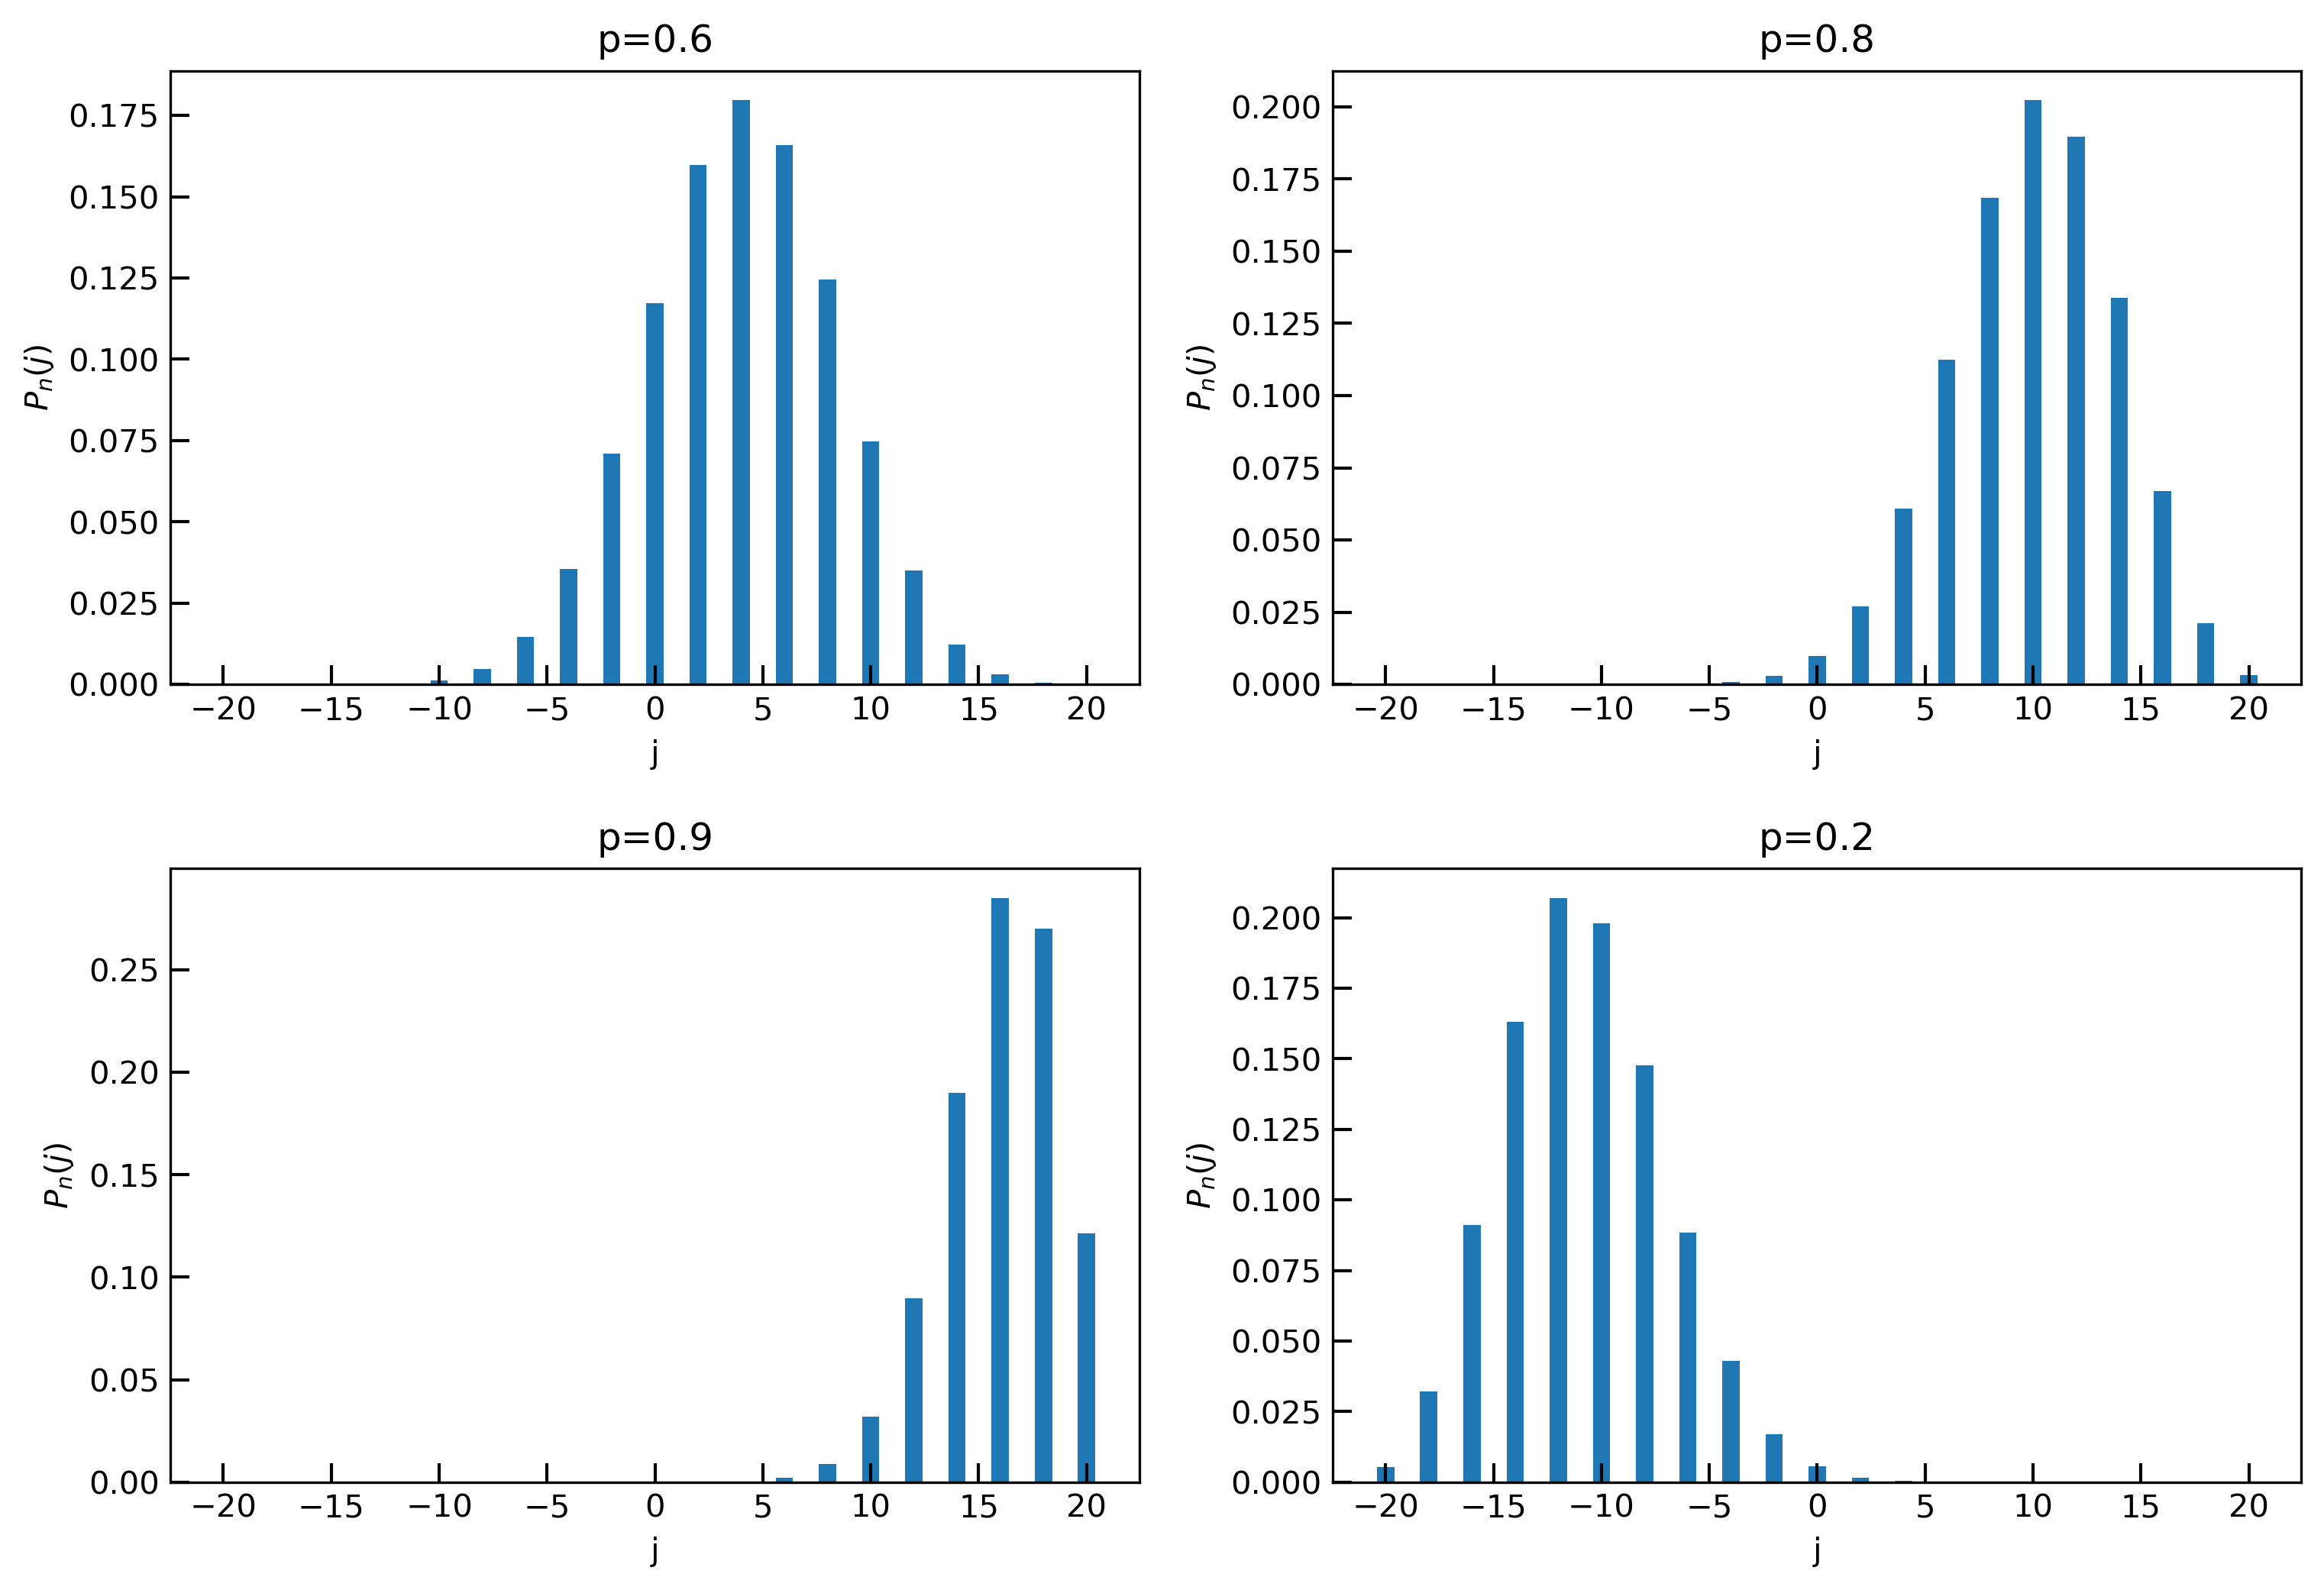

In [102]:
#now format your figure
row_num, col_num=2,2
fig,ax = plt.subplots(row_num,col_num)
fig.set_size_inches(6*col_num,4*row_num)
fig.set_dpi(300)

axs=ax.ravel()
x_array=np.arange(-20, 20+1) #the x_array, which is the values of j


for i in range(len(axs)):
    p=ps[i] #select the p for each subplot
    axs[i].bar(x_array, all_pn[p])
    axs[i].set_xlabel('j') 
    axs[i].set_ylabel(r'$P_n(j)$')
    axs[i].tick_params(axis='both', which='major', direction='in', length=6, width=1)
    axs[i].set_title('p={0:0.1f}'.format(p))


fig.subplots_adjust(hspace=0.3)

## We see that the center of the distriution is highly effected by p: when p is large (i.e. higher probability to take to the right) then the probability to be in a site that is more to the right (i.e. large i) is higher as well. 